## Predicting survivors of the Titanic with Kaggle's random forest tutorial model

I wanted to see how the outcomes compared to my own models.

In [1]:
## Initialising libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
## Importing datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
## Creating a random forest model
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf_model.fit(X, y)
y_pred_rf = rf_model.predict(X_test)

In [4]:
## Showing output of prediction model
rf_model_output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred_rf})
rf_model_output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
## Visualising output
rf_model_output_count = pd.DataFrame(rf_model_output['Survived'].value_counts().reset_index(name='Count'))
rf_model_output_count

,Survived,Count
0,0,270
1,1,148


Text(0.5, 1.0, 'Random forest model prediction')

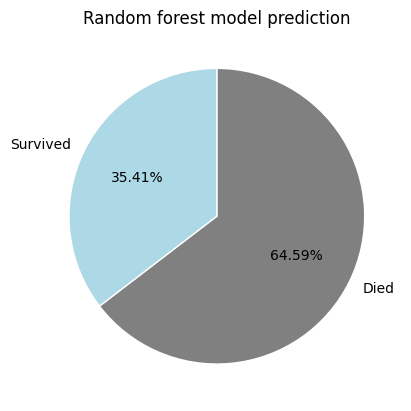

In [6]:
## Creating a pie chart
fig, ax = plt.subplots()
labels = ['Died', 'Survived']
colors = ['gray', 'lightblue']
ax.pie(rf_model_output_count['Count'], labels=labels, colors=colors, counterclock = False, startangle=90, autopct='%1.2f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax.set_title('Random forest model prediction')